### Assignment 1: UN Debates, World Happiness and International Trade
### Fundamentals of Data Science

In [2]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a dataframe from the raw data folders and txt files
sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename)) as f:
            if filename[0]==".": #ignore hidden files
                continue
            splt = filename.split("_")
            data.append([session, 1945+session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])
df_codes = pd.read_csv('UNSD — Methodology.csv', delimiter=';')

# Merge data with regions and such
df = pd.merge(left=df_speech, right=df_codes, how='left', on='ISO-alpha3 Code')
df = df[["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Least Developed Countries (LDC)", "Session", "Year", "Speech"]]
un_df = df.set_index(['Year', 'ISO-alpha3 Code'])

## The data for the UN debates
un_df.head()

Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 AUT                     Austria      Europe   
     MEX                      Mexico    Americas   
     COG                       Congo      Africa   
     DZA                     Algeria      Africa   
     LKA                   Sri Lanka        Asia   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 AUT                               Western Europe   
     MEX              Latin America and the Caribbean   
     COG                           Sub-Saharan Africa   
     DZA                              Northern Africa   
     LKA                                Southern Asia   

                     Least Developed Countries (LDC)  Session  \
Year ISO-alpha3 Code                                            
1970 AUT                                         NaN       25   
     MEX                                         NaN       25   
     COG                                         NaN       25   
     DZA                                         NaN       25   
     LKA                                         NaN       25   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 AUT              155.\t  May I begin by expressing to Ambassado...  
     MEX              33.\t  Mr. President, I take great pleasure in...  
     COG              122.\t  I cannot begin my intervention without...  
     DZA              1.  The delegation of Algeria is very pleased ...  
     LKA              176.\t Mr. President, the delegation of Ceylon...

Total null values in Country name: 0
Total null values in year: 0
Total null values in Life Ladder: 0
Total null values in Log GDP per capita: 9
Total null values in Social support: 11
Total null values in Healthy life expectancy at birth: 10
Total null values in Freedom to make life choices: 28
Total null values in Generosity: 53
Total null values in Perceptions of corruption: 110
Total null values in Positive affect: 22
Total null values in Negative affect: 14
Total null values in Region Name: 0
Total null values in Sub-region Name: 0
Total null values in ISO-alpha3 Code: 0


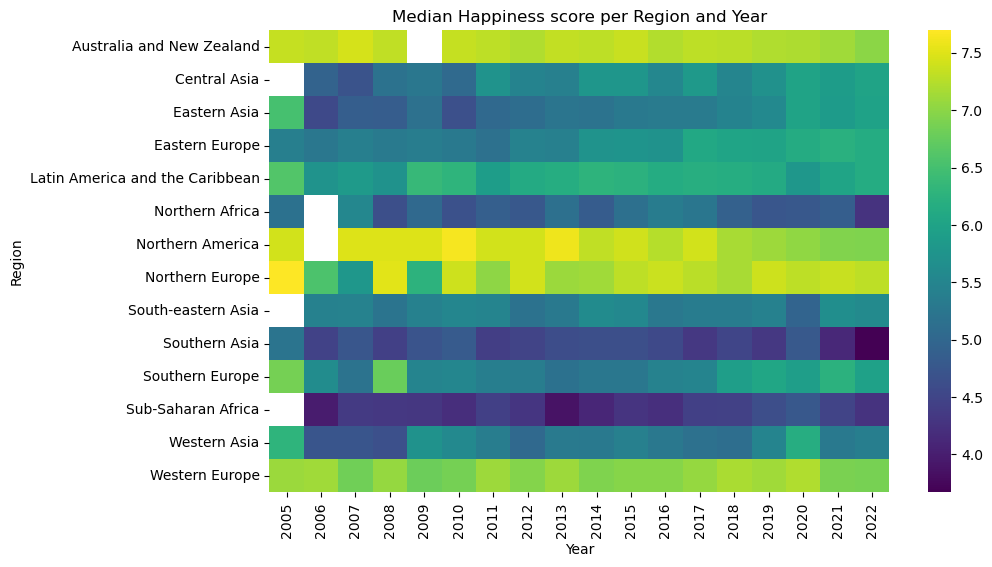

In [7]:
# Create a dataframe for the world happyiness data
happy_df = pd.read_excel('DataForTable2.1WHR2023.xls') 

# Merging and cleanup of the data
df_codes_simple = df_codes[['Region Name', 'Sub-region Name', 'Country or Area', 'ISO-alpha3 Code']]
happy_df_merged = pd.merge(left=happy_df, right=df_codes_simple, how='inner', left_on=['Country name'], right_on=['Country or Area'])
happy_df_merged.drop('Country or Area',axis=1, inplace=True)

# Describe null values in dataset
for x in happy_df_merged.columns:
    num_nulls = happy_df_merged[x].isnull().sum()
    print(f"Total null values in {x}: {num_nulls}")

# Create a heatmap to visualize the data points of the countries, year and lifeladder
pivot_df = happy_df_merged.pivot_table(index='Sub-region Name', columns='year', values='Life Ladder', aggfunc='median')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cbar=True, cmap='viridis')
plt.title('Median Happiness score per Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()